In [77]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf

plt.style.use('college_track')
mpl.rcParams.update({'font.size': 8})


colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]



In [80]:
ninth_grade = pd.read_pickle("../data/processed/ninth_grade.pkl")
tenth_grade = pd.read_pickle("../data/processed/tenth_grade.pkl")
eleventh_grade = pd.read_pickle("../data/processed/eleventh_grade.pkl")
overall_df_final = pd.read_pickle("../data/processed/overall.pkl")

In [81]:
def create_regression_plots_row(df, grade, x_data, y_variable, row, fig, axs, y_label, x_label_addition, colors):
    x_variables = ["Tutoring", "Math_Blast", "Math", "Other_Workshop"]
    x_data_columns = [x_data + "_" + str(grade) + "th Grade_" + i for i in x_variables]
    
    y_label_exta = str(grade + 1) + "th Grade " + y_label

    y_column = y_variable + "_" + str(grade+1)+"th Grade"

    for i in range(len(x_data_columns)):
        x_label =  str(grade) + "th Grade " + x_variables[i] + " " + x_label_addition
        sns.regplot(data=df, x=x_data_columns[i],
                    y=y_column, ax=axs[row, i], line_kws={"color": "#666666"}, color=colors[i], lowess=False, robust=False, order=1)
        if i ==0:
            axs[row, i].set(xlabel=x_label, ylabel=y_label_exta)
        else:
            axs[row, i].set(xlabel=x_label, ylabel="")

In [82]:
def create_regression_grid(df, grade):
    fig, axs = plt.subplots(4, 4, figsize=(8, 10), sharey="row")

    fig.suptitle(str(grade) + "th Grade Plots")
    create_regression_plots_row(df, grade, "Attendance_Numerator",
                                "GPA_semester_cumulative__c", 0, fig, axs, "GPA", "(Sessions)", colors)

    create_regression_plots_row(df, grade, "Attendance_Numerator",
                                "max_converted_math", 1, fig, axs, "Math Test Score", "(Sessions)", colors)

    create_regression_plots_row(df, grade, "mod_duration_filled",
                                "GPA_semester_cumulative__c", 2, fig, axs, "Math Test Score", "(Minutes)", colors)

    create_regression_plots_row(df, grade, "mod_duration_filled",
                                "max_converted_math", 3, fig, axs, "Math Test Score", "(Minutes)", colors)
    plt.show()

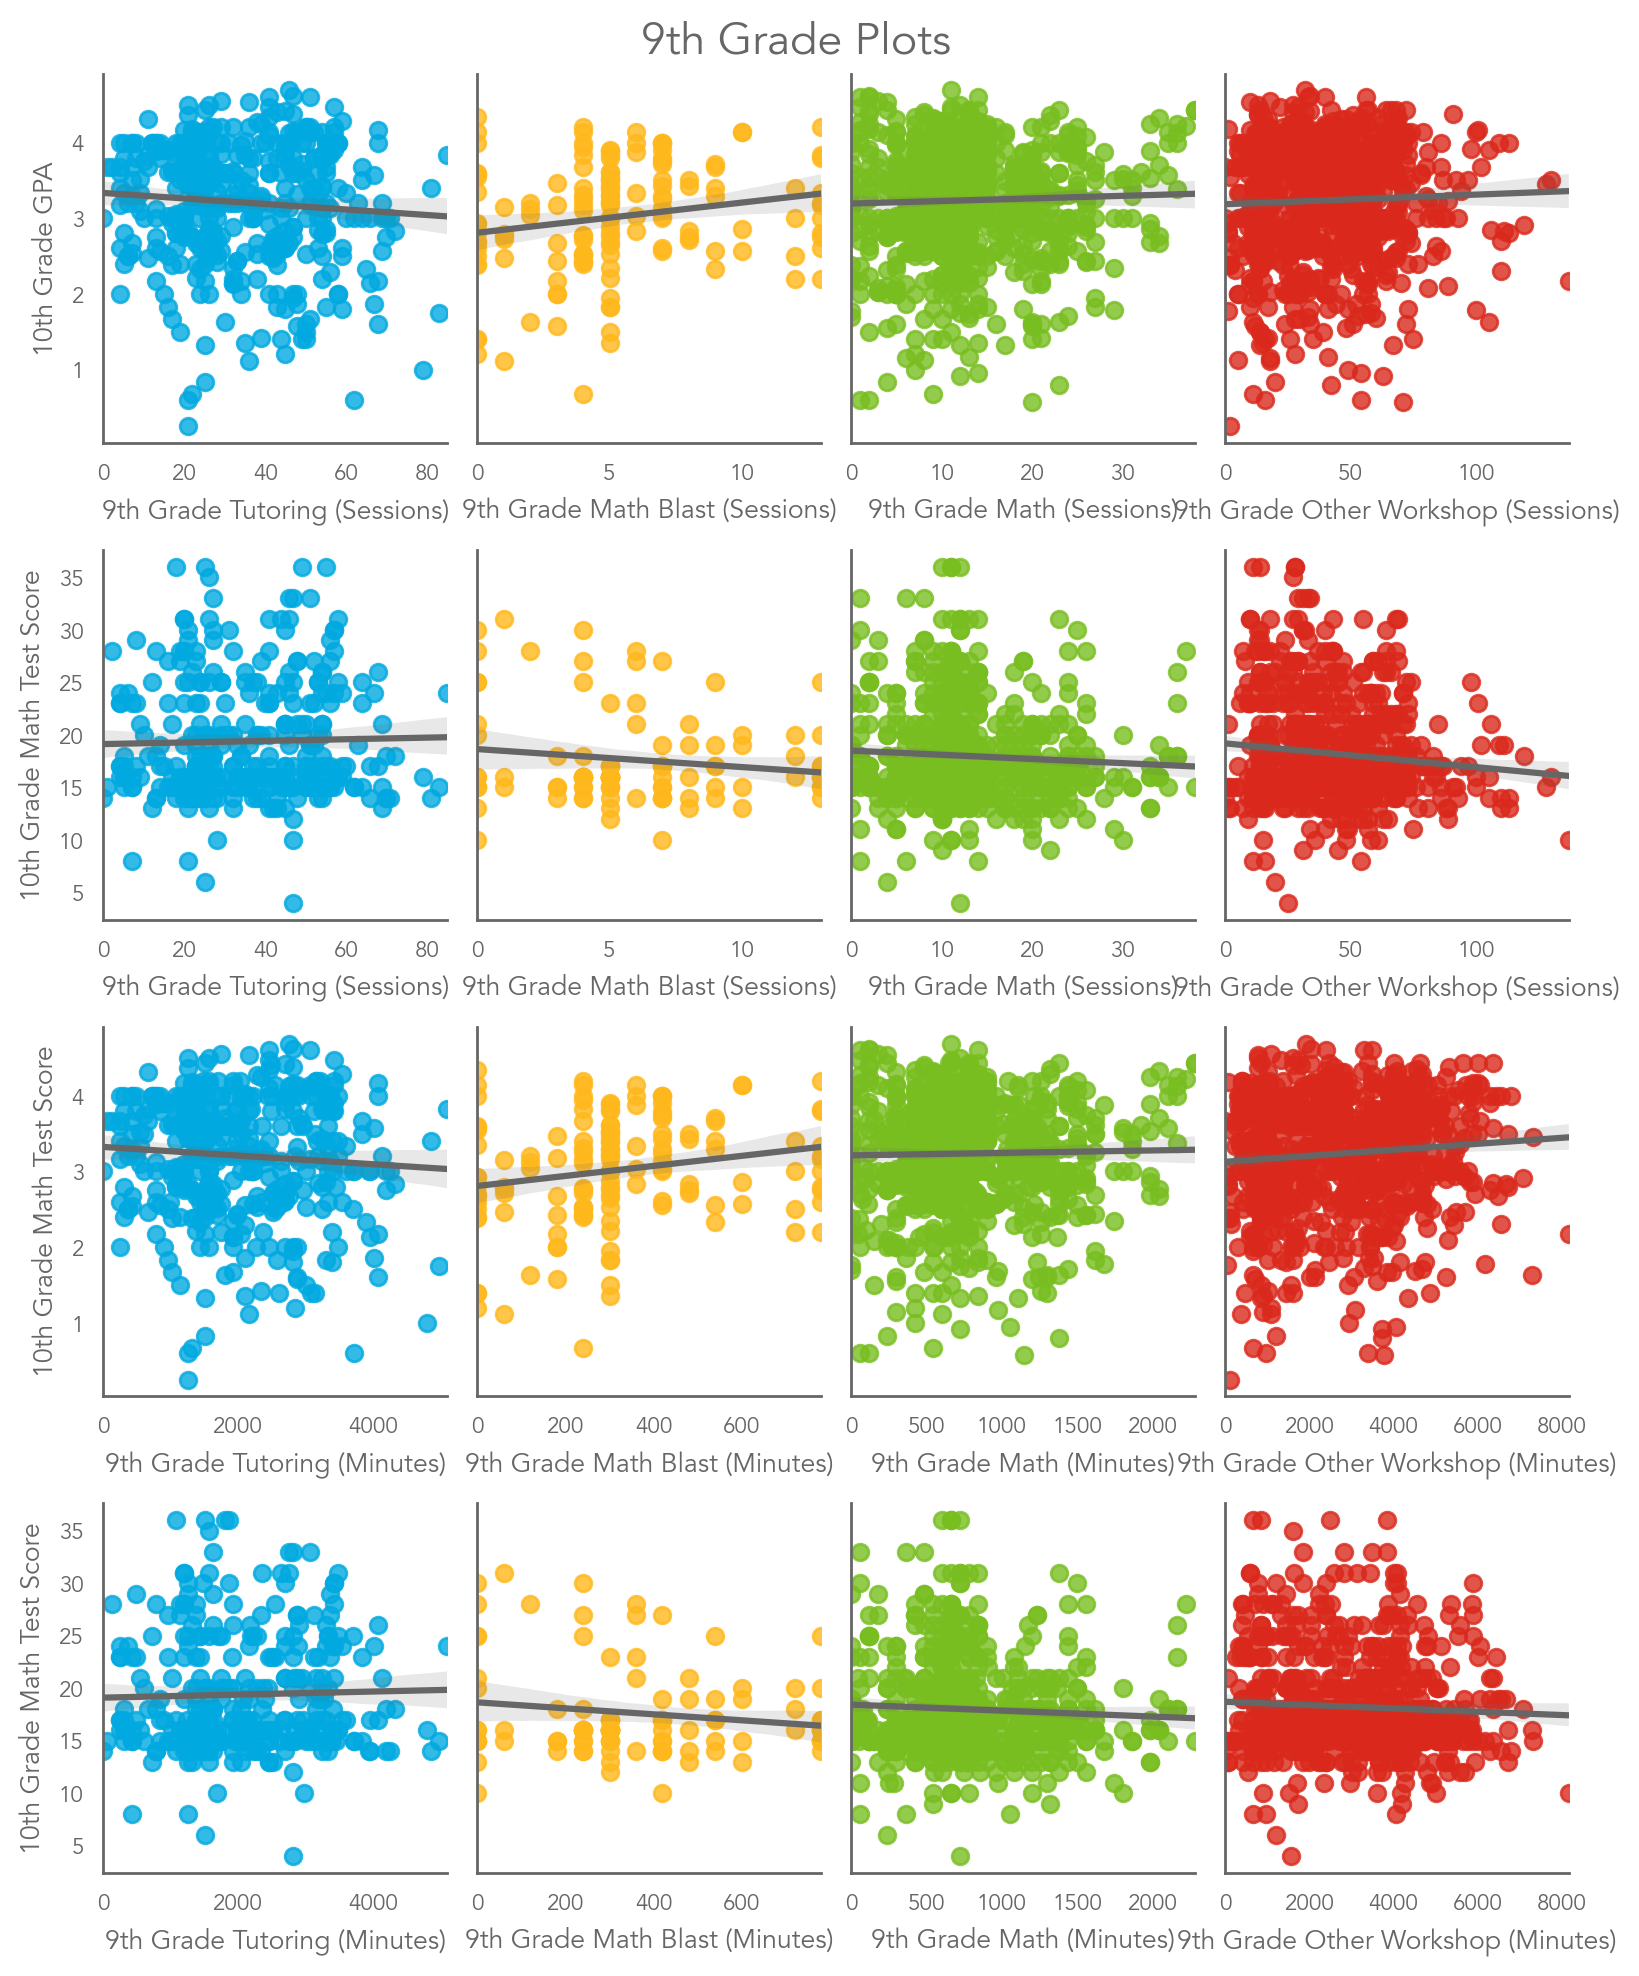

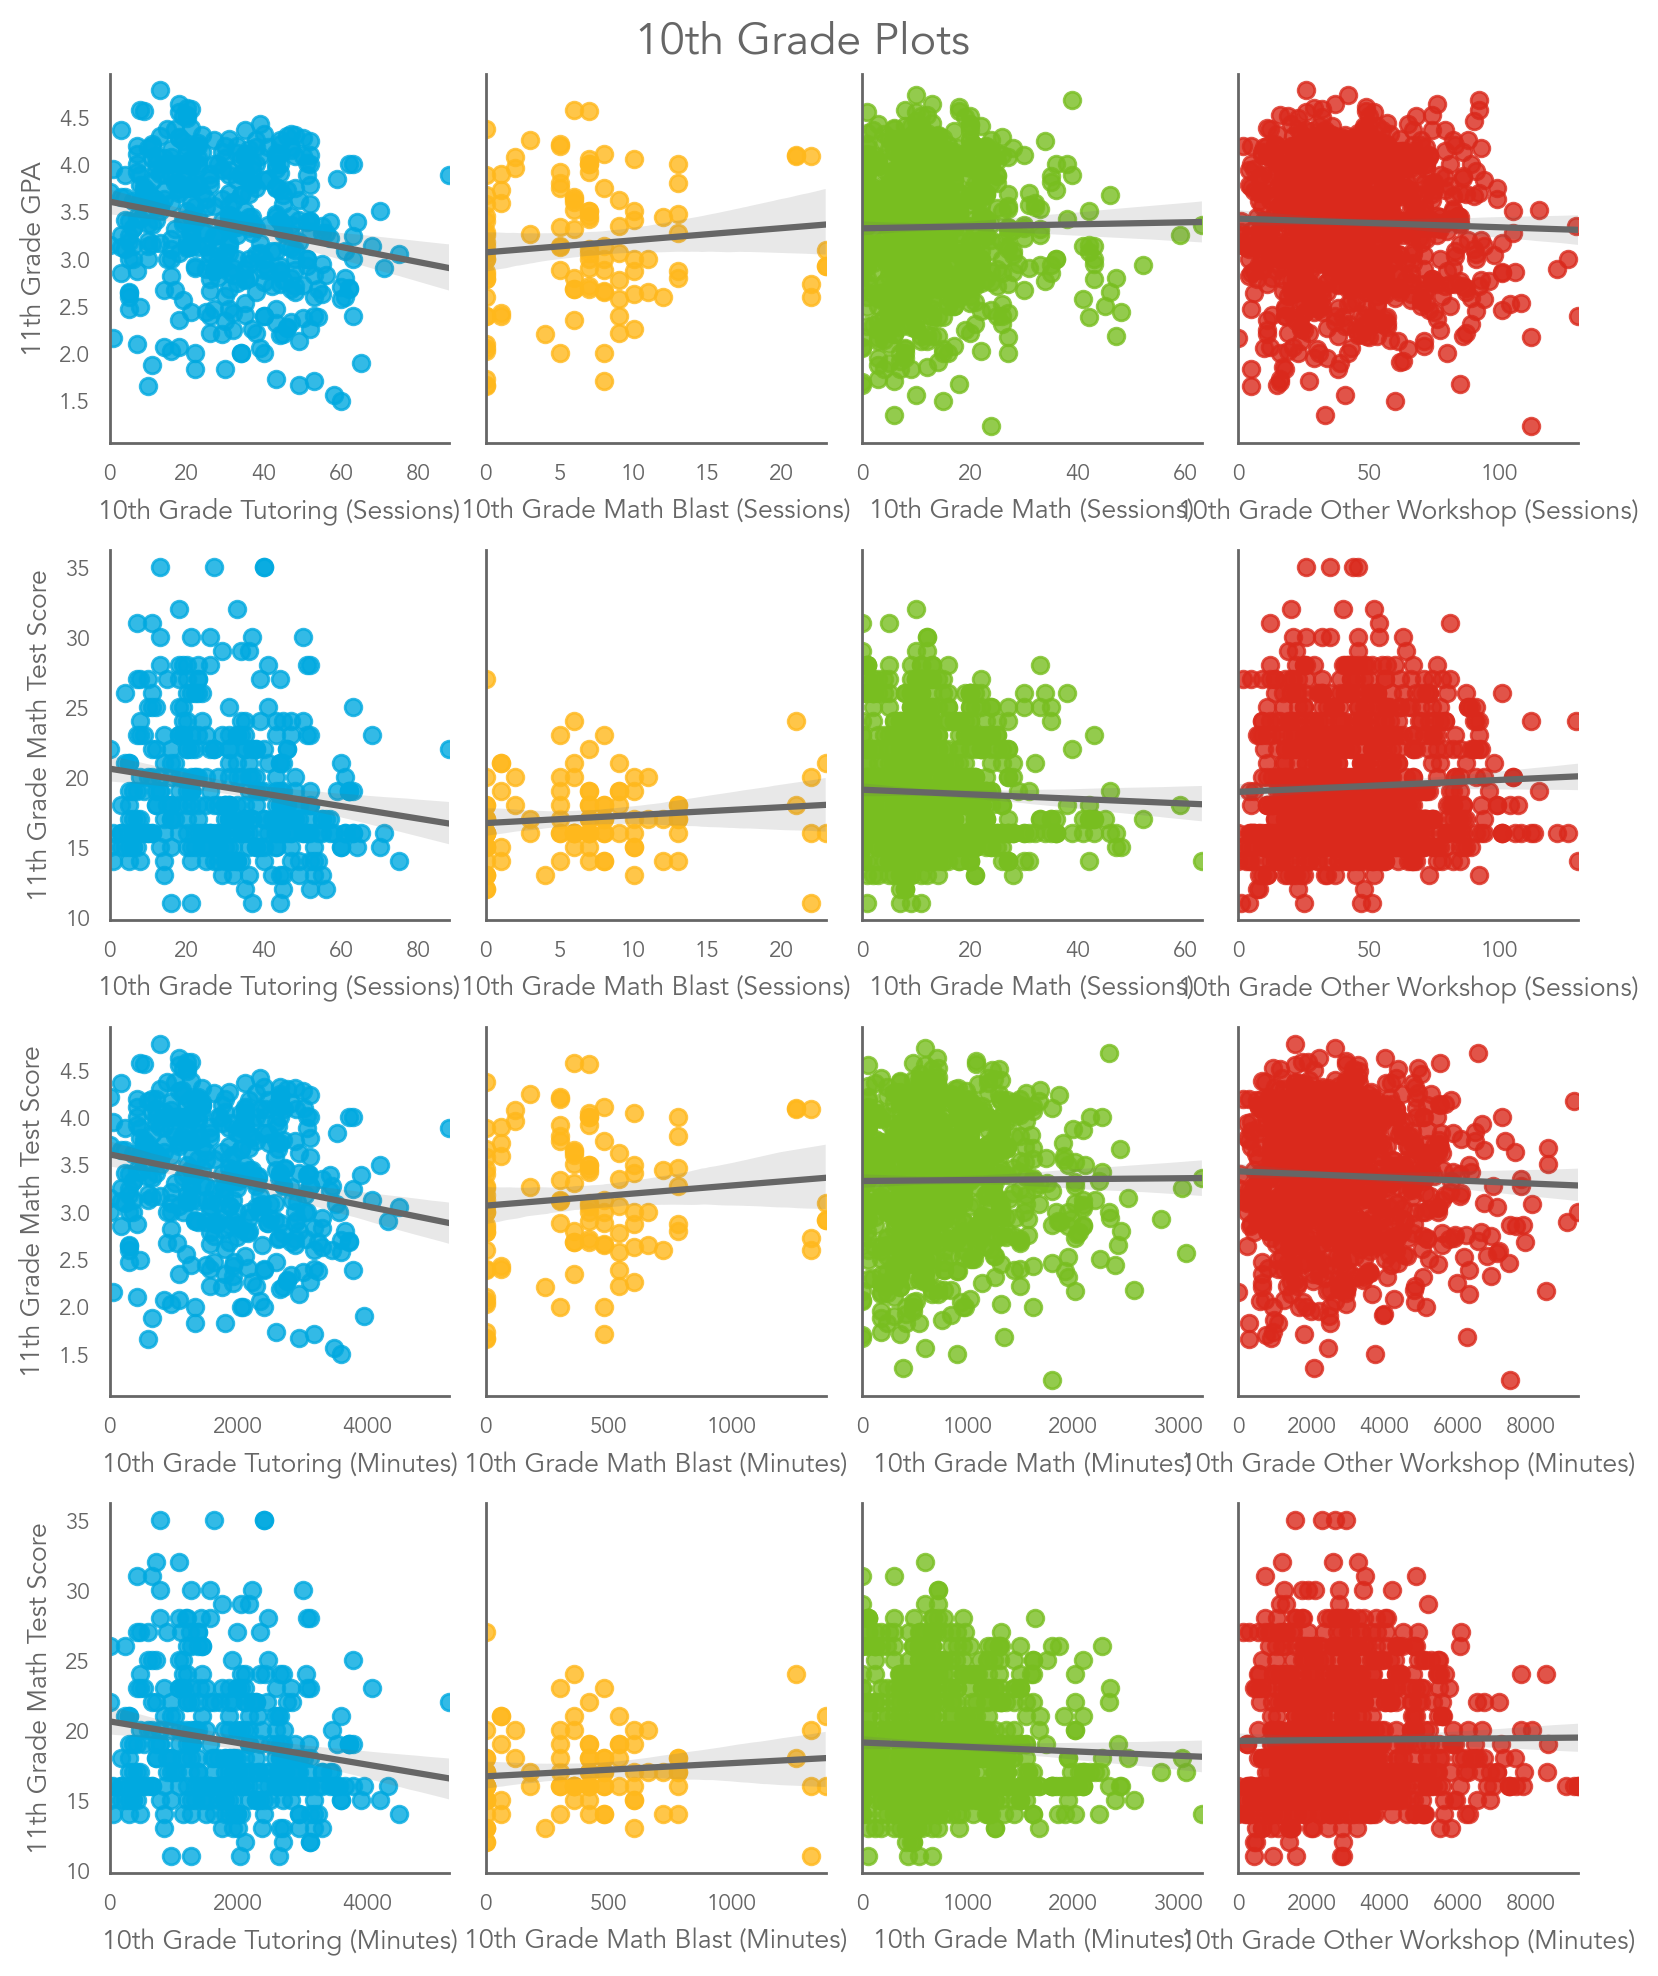

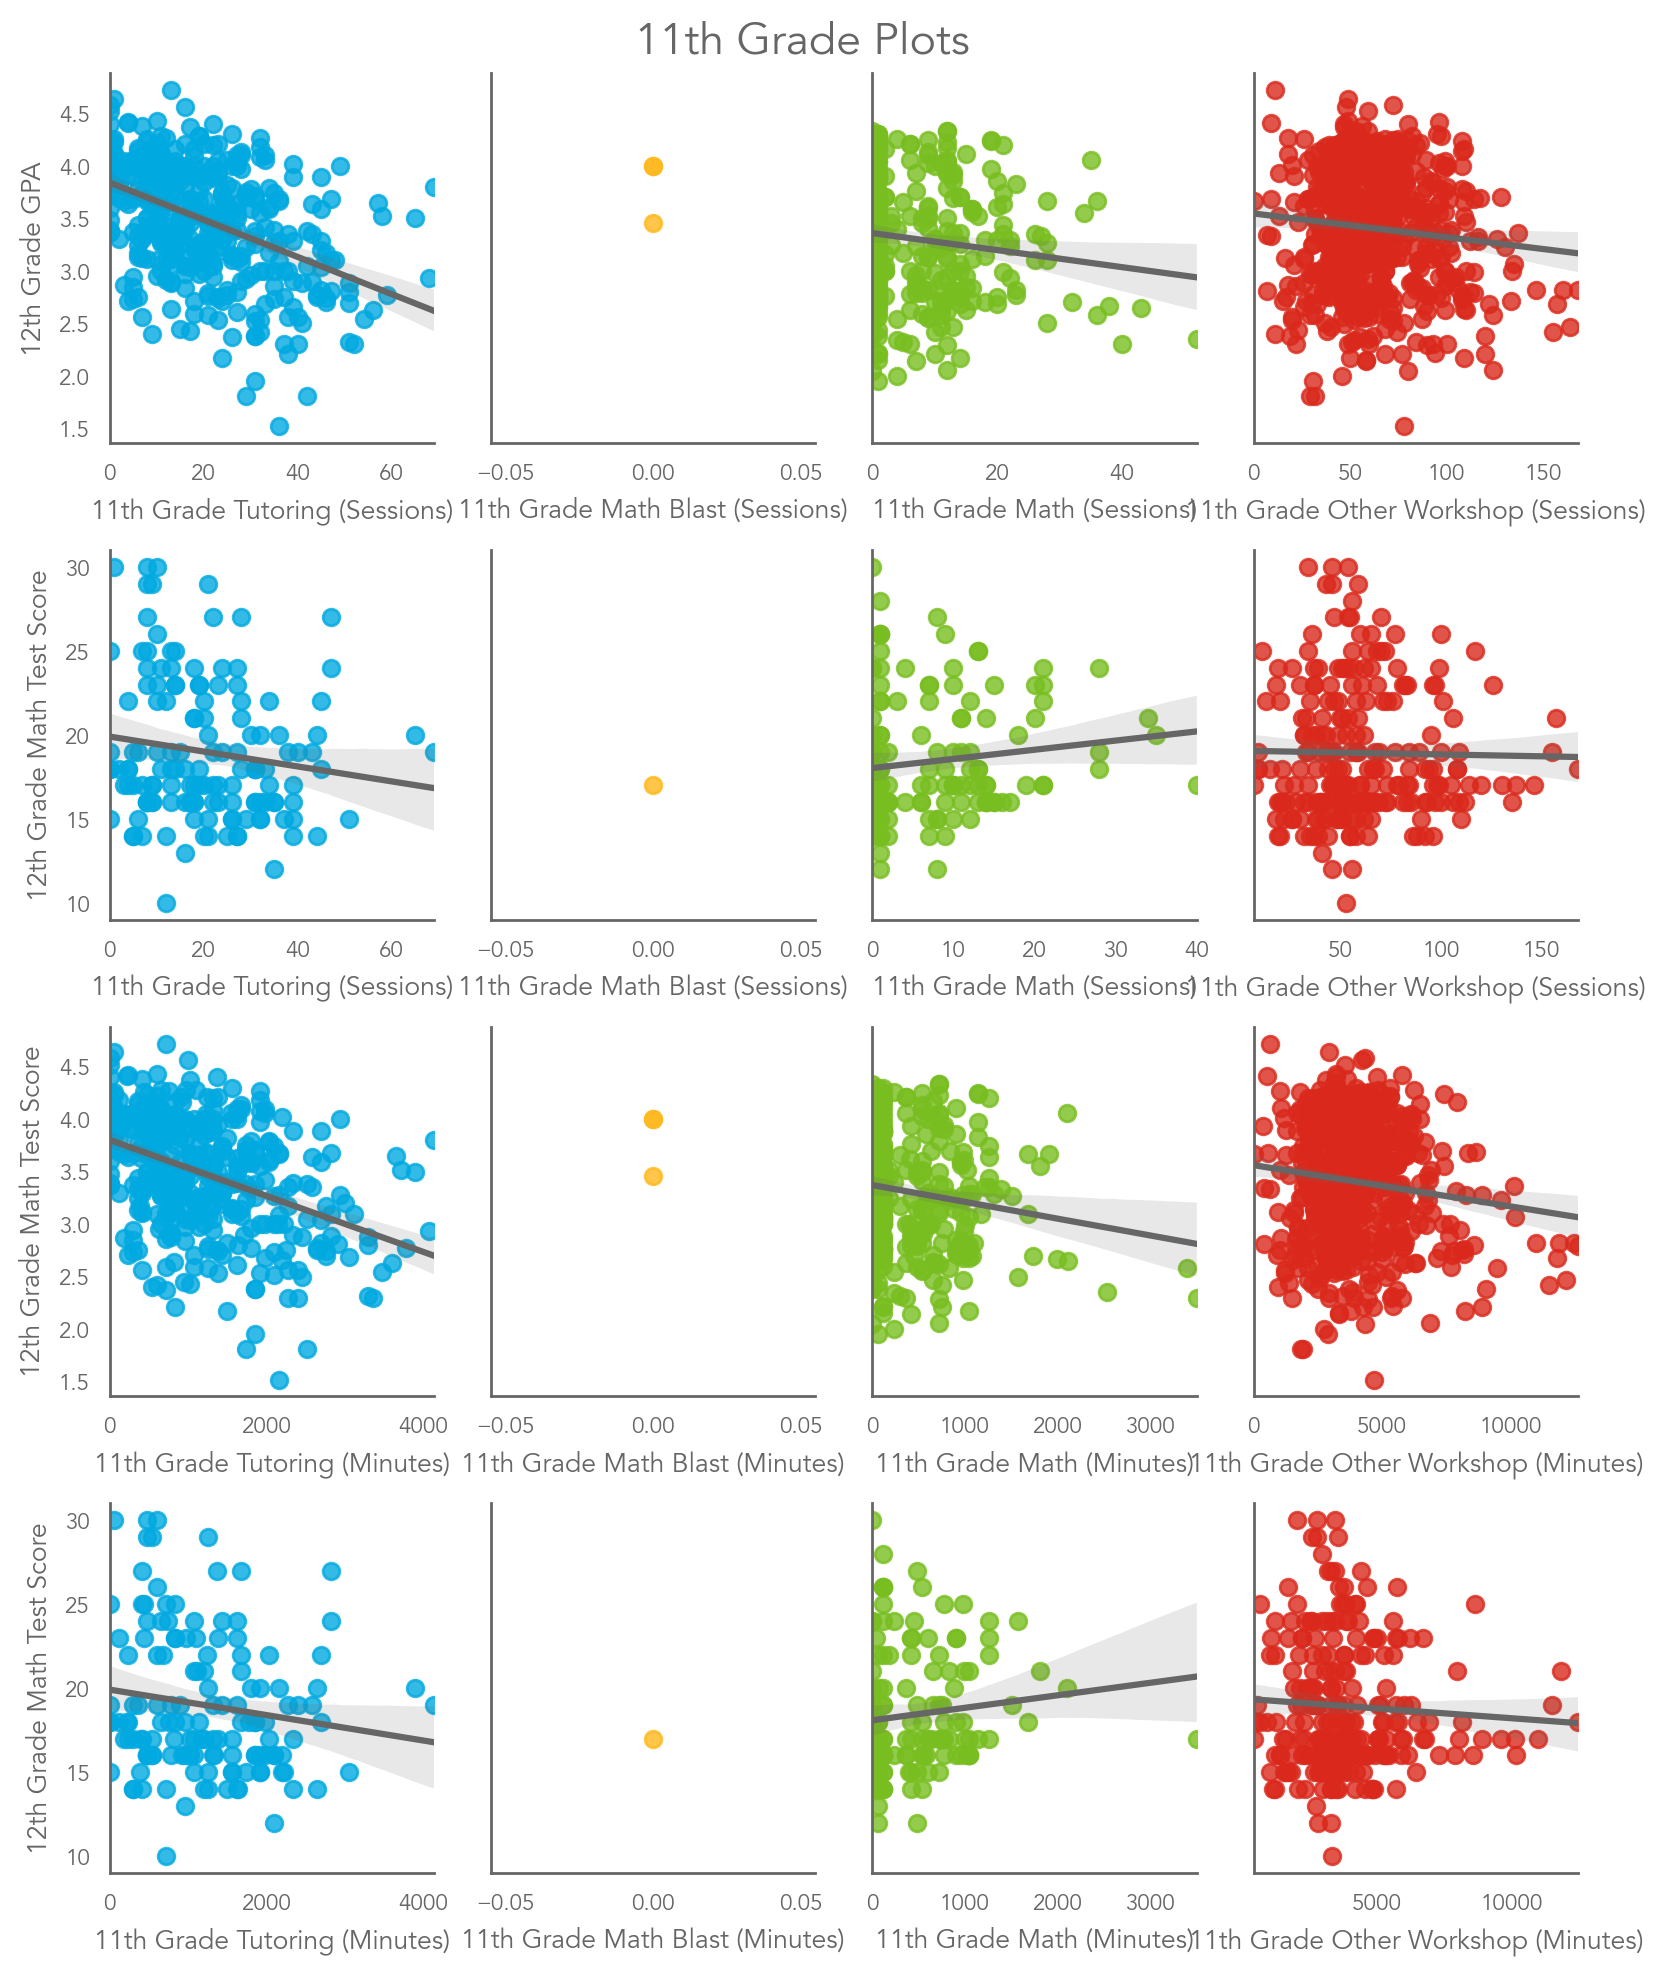

In [176]:
list_of_dfs = [ninth_grade, tenth_grade, eleventh_grade]

for i, df in enumerate(list_of_dfs):
    create_regression_grid(df, 9+i)


In [84]:
def create_regression_plots_overall(df, x_data, y_variable, fig, axs, y_label, x_label_addition, colors, row):
    x_variables = ["Tutoring", "Math_Blast", "Math", "Other_Workshop"]
    x_data_columns = [x_data + "_" + i for i in x_variables]
    

    for i in range(len(x_data_columns)):
        _df_sub = df[df[x_data_columns[i]] > 0]
        x_label =   x_variables[i] + " " + x_label_addition
        sns.regplot(data=_df_sub, x=x_data_columns[i],
                    y=y_variable, ax=axs[row,i], line_kws={"color": "#666666"}, color=colors[i])
        if i ==0:
            axs[row,i].set(xlabel=x_label, ylabel=y_label)
        else:
            axs[row,i].set(xlabel=x_label, ylabel="")

In [85]:
overall_df_valid_first_gpa = overall_df_final[overall_df_final.first_gpa_grade != "11th Grade"]

overall_df_first_gpa_low = overall_df_valid_first_gpa[(overall_df_valid_first_gpa.first_gpa <= 2.75) ]

overall_df_valid_first_math = overall_df_final[overall_df_final.first_math_grade != overall_df_final.highest_math_score_grade]

overall_df_first_math_low = overall_df_valid_first_math[(overall_df_valid_first_math.first_gpa < 16) ]



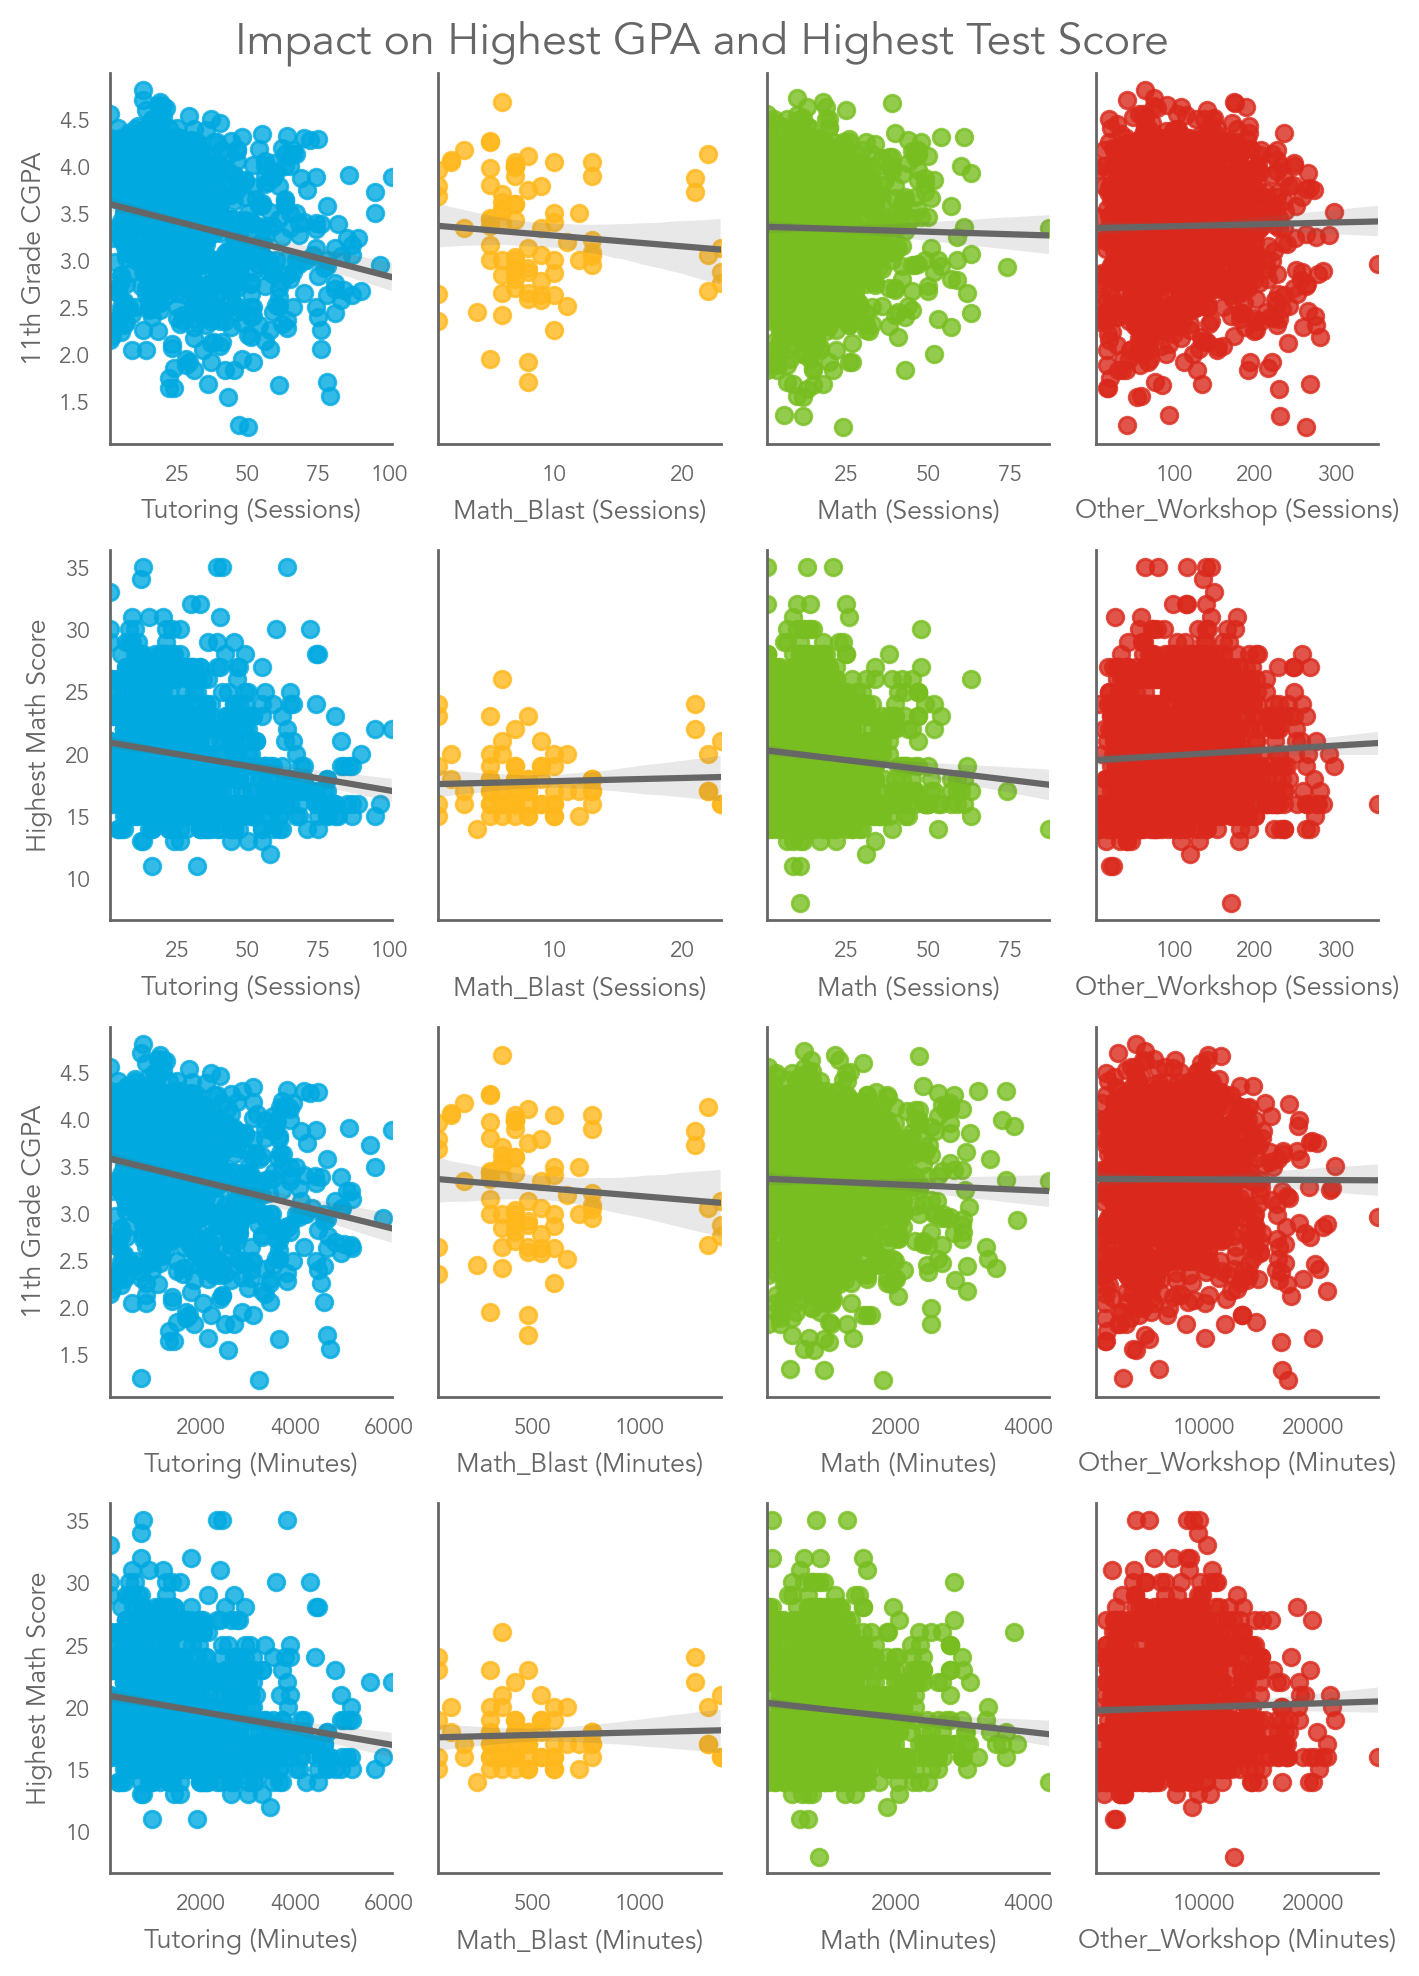

In [87]:

fig, axs = plt.subplots(4,4, figsize=(7, 10), sharey="row")
fig.suptitle("Impact on Highest GPA and Highest Test Score")


create_regression_plots_overall(overall_df_final, "Attendance_Numerator",
                                "HS_11th_Cum_GPA", fig, axs, "11th Grade CGPA", "(Sessions)", colors, 0)

create_regression_plots_overall(overall_df_final, "Attendance_Numerator",
                                "highest_math_score", fig, axs, "Highest Math Score", "(Sessions)", colors, 1)

create_regression_plots_overall(overall_df_final, "mod_duration_filled",
                                "HS_11th_Cum_GPA", fig, axs, "11th Grade CGPA", "(Minutes)", colors, 2)

create_regression_plots_overall(overall_df_final, "mod_duration_filled",
                                "highest_math_score", fig, axs, "Highest Math Score", "(Minutes)", colors, 3)

# plt.savefig('overall.png',facecolor='w', edgecolor='w')


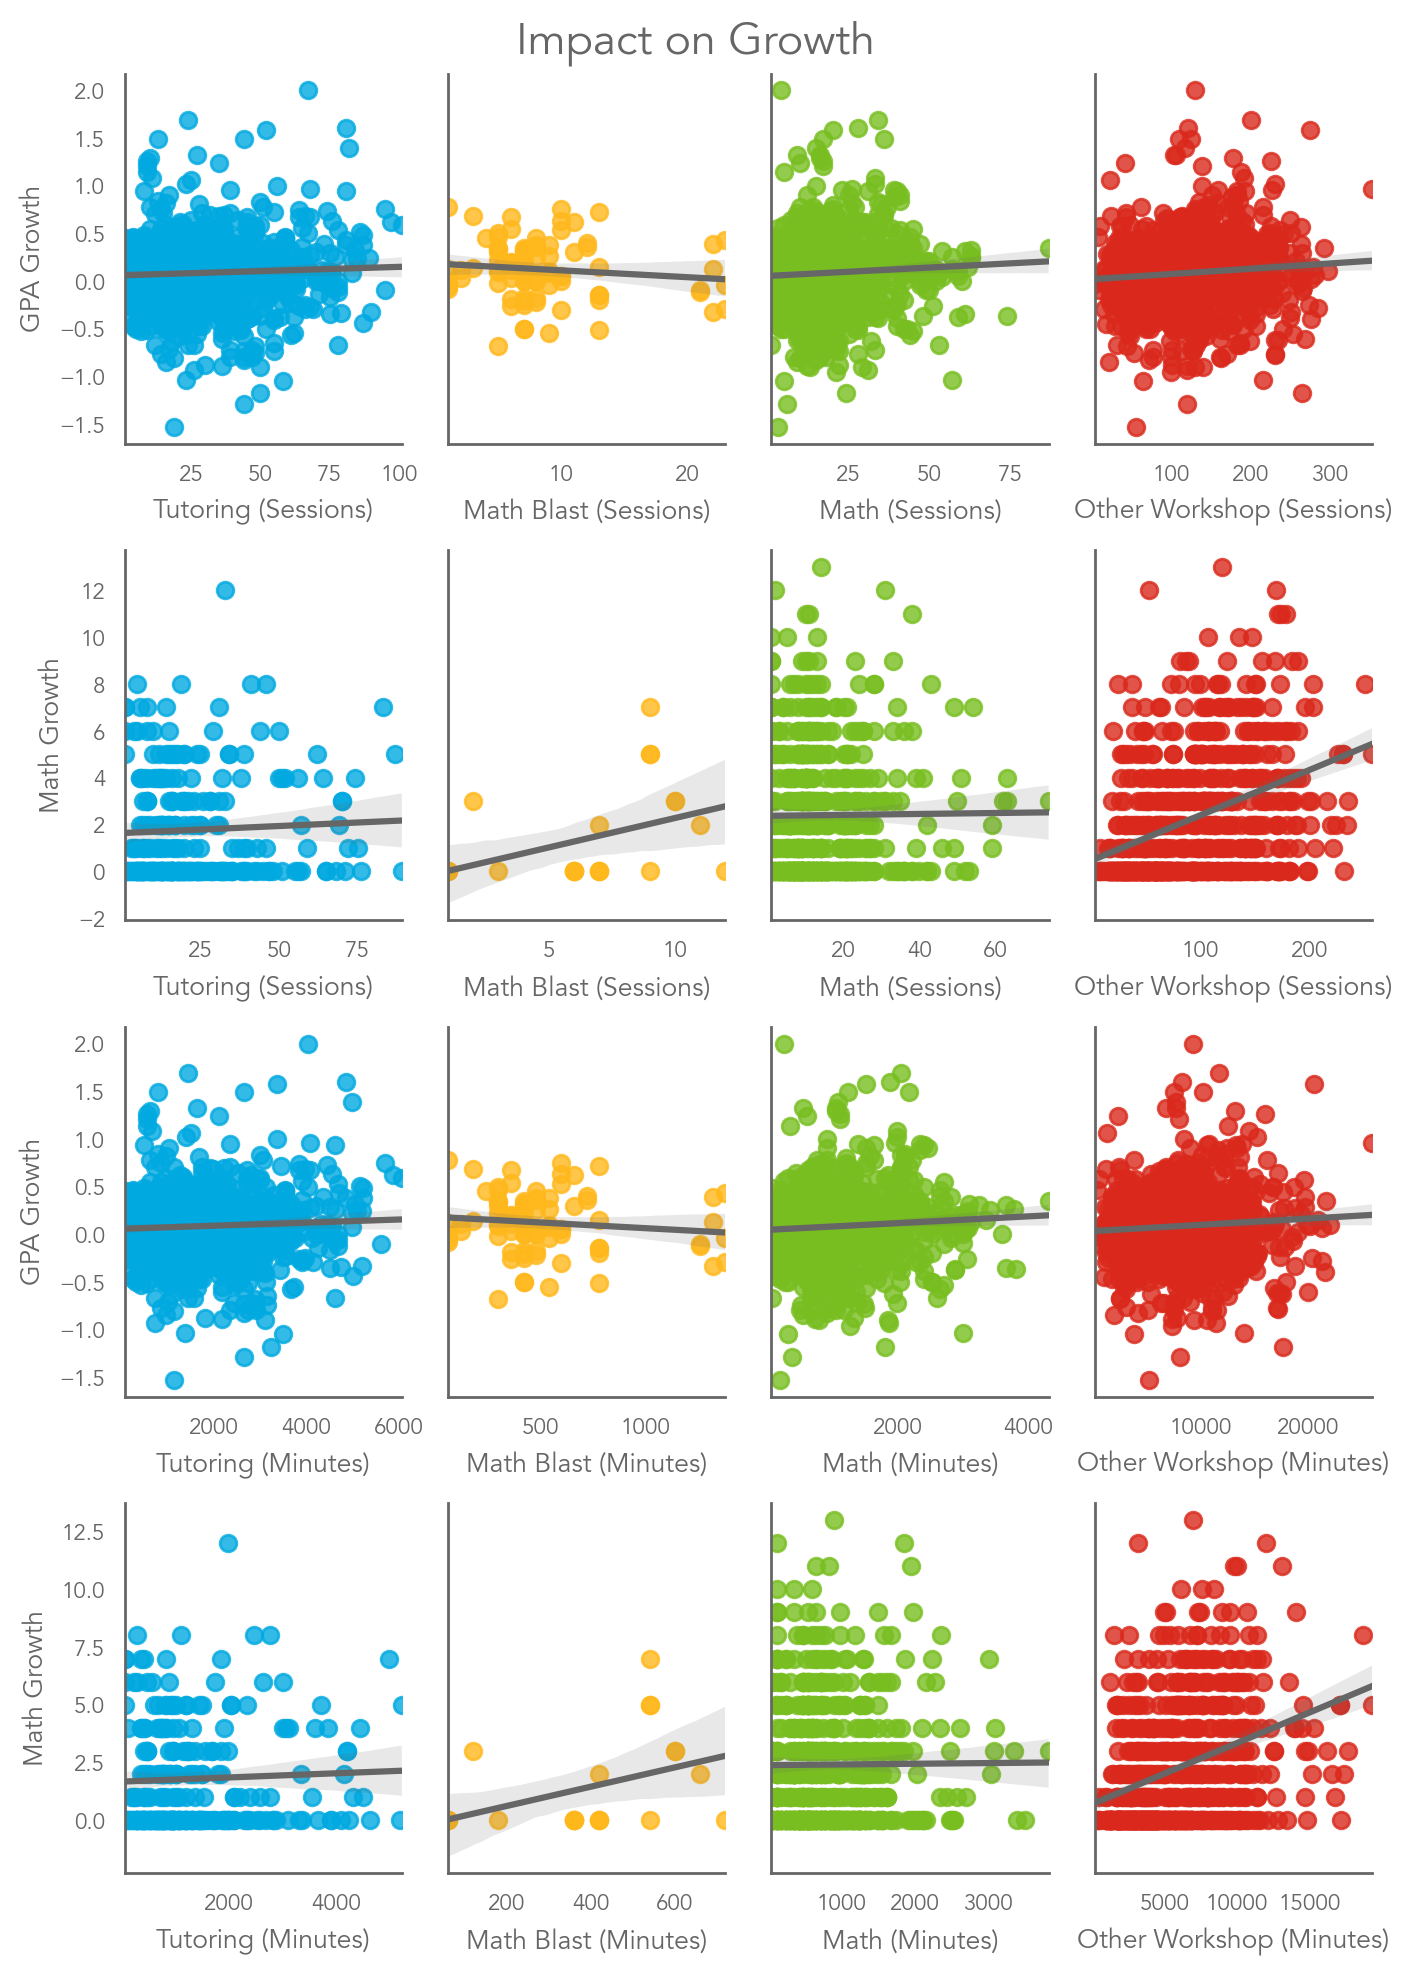

In [72]:

fig, axs = plt.subplots(4,4, figsize=(7, 10), sharey="row")
fig.suptitle("Impact on Growth")


create_regression_plots_overall(overall_df_valid_first_gpa, "Attendance_Numerator",
                                "gpa_growth", fig, axs, "GPA Growth", "(Sessions)", colors, 0)

create_regression_plots_overall(overall_df_valid_first_math, "Attendance_Numerator",
                                "math_test_growth", fig, axs, "Math Growth", "(Sessions)", colors, 1)

create_regression_plots_overall(overall_df_valid_first_gpa, "mod_duration_filled",
                                "gpa_growth", fig, axs, "GPA Growth", "(Minutes)", colors, 2)

create_regression_plots_overall(overall_df_valid_first_math, "mod_duration_filled",
                                "math_test_growth", fig, axs, "Math Growth", "(Minutes)", colors, 3)



plt.savefig('overall.png',facecolor='w', edgecolor='w')


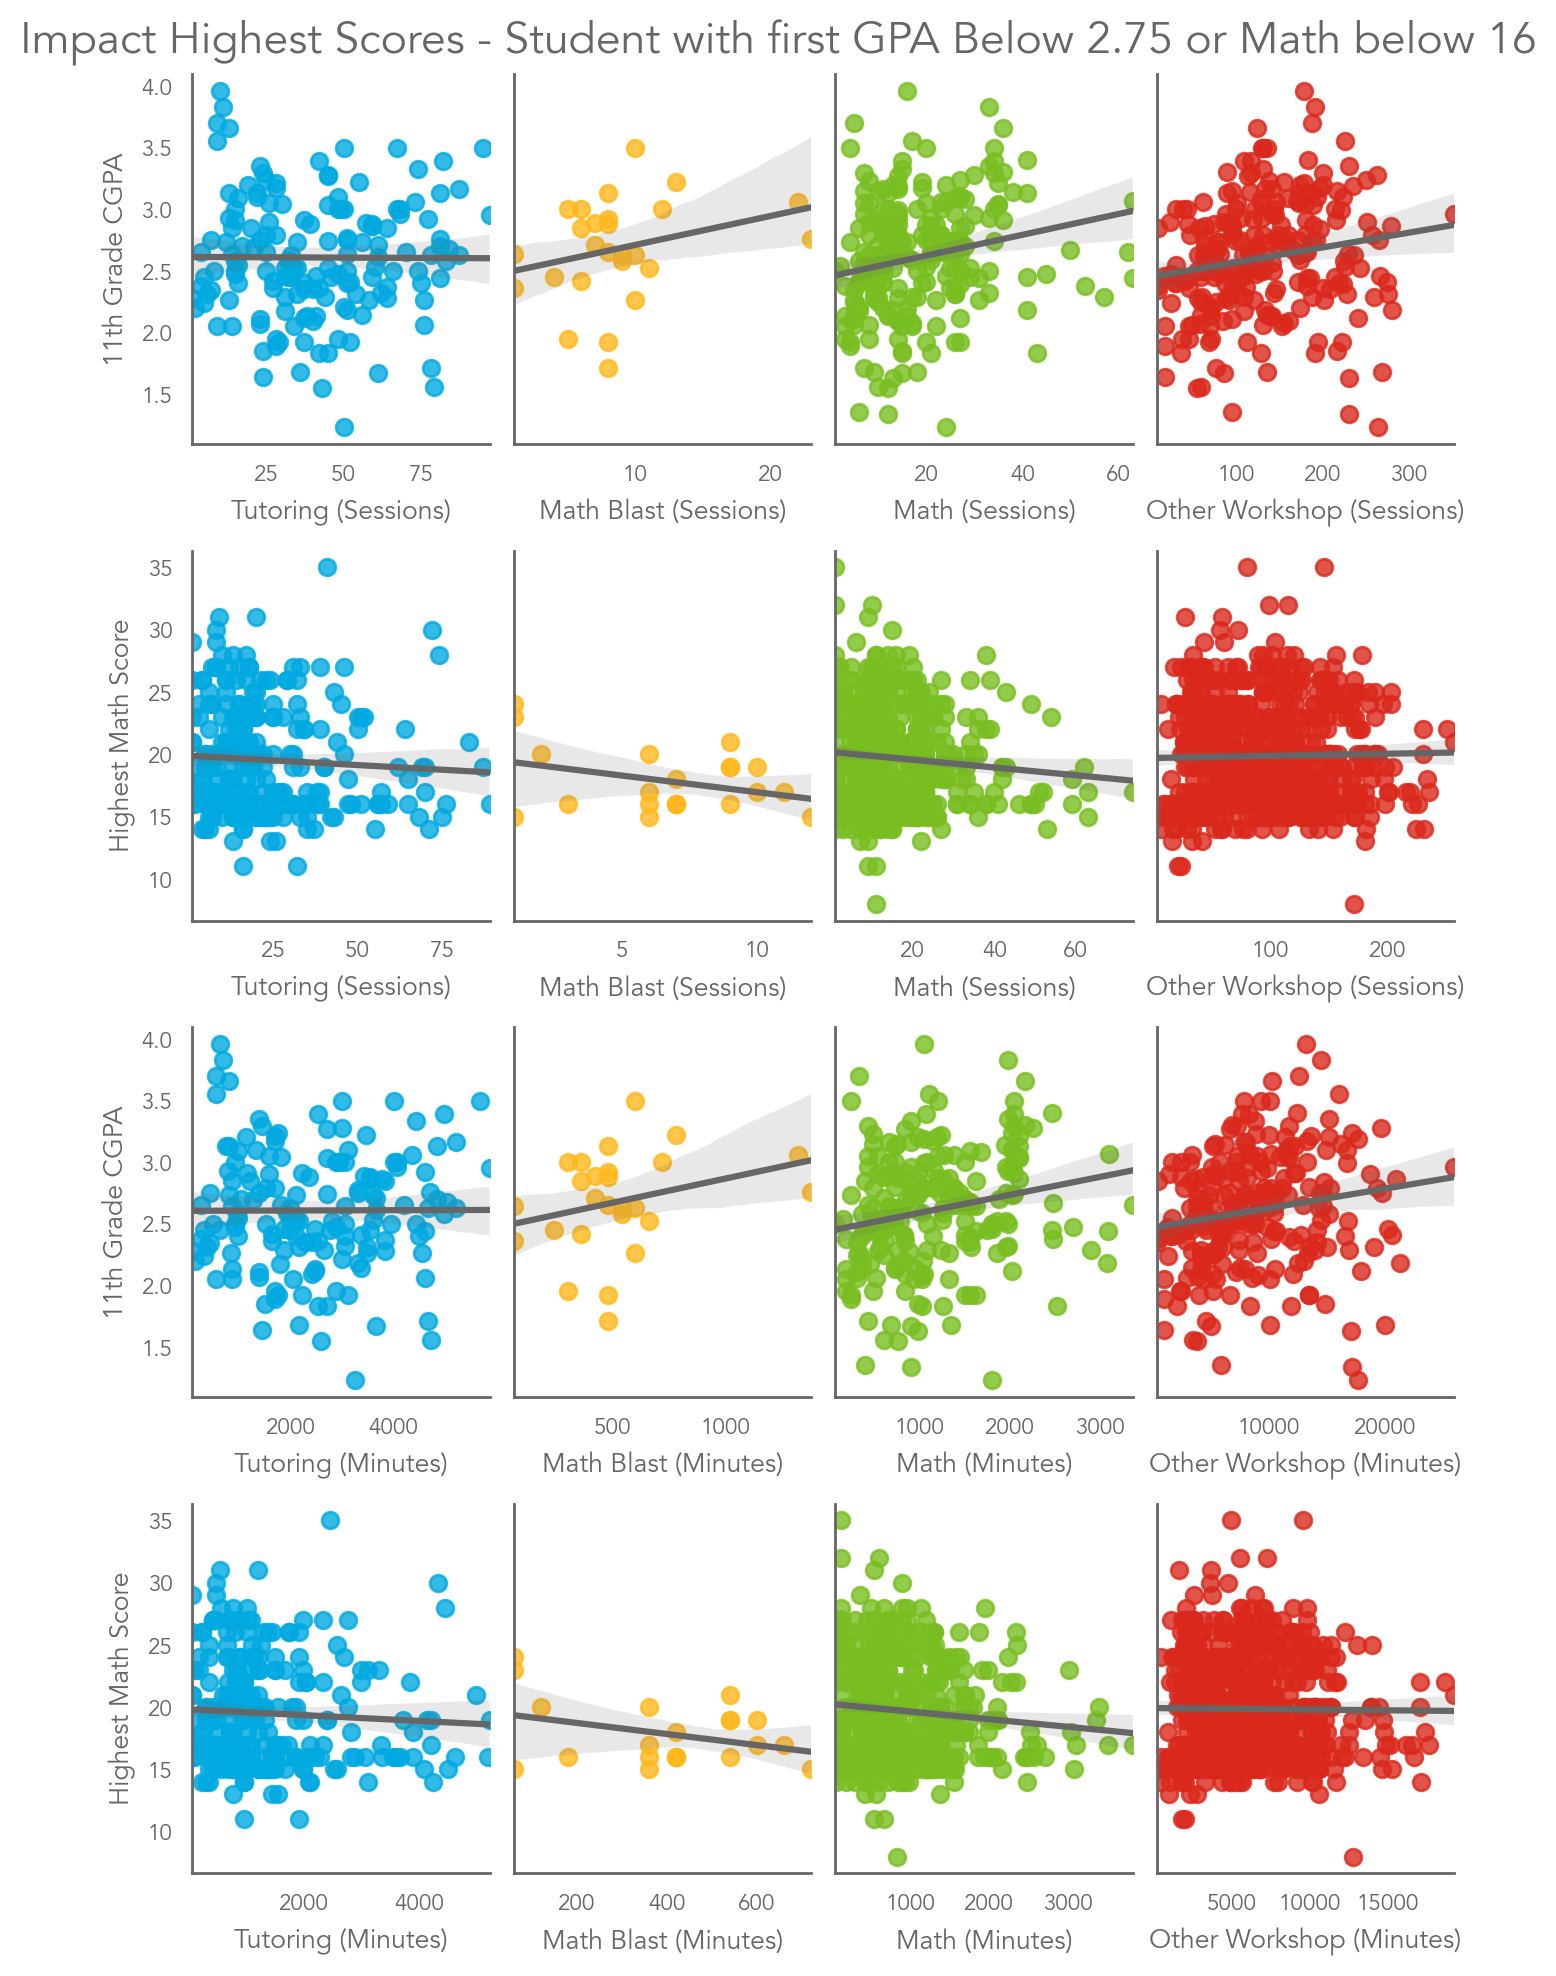

In [76]:

fig, axs = plt.subplots(4,4, figsize=(7, 10), sharey="row")
fig.suptitle("Impact Highest Scores - Student with first GPA Below 2.75 or Math below 16")


create_regression_plots_overall(overall_df_first_gpa_low, "Attendance_Numerator",
                                "HS_11th_Cum_GPA", fig, axs, "11th Grade CGPA", "(Sessions)", colors, 0)

create_regression_plots_overall(overall_df_first_math_low, "Attendance_Numerator",
                                "highest_math_score", fig, axs, "Highest Math Score", "(Sessions)", colors, 1)

create_regression_plots_overall(overall_df_first_gpa_low, "mod_duration_filled",
                                "HS_11th_Cum_GPA", fig, axs, "11th Grade CGPA", "(Minutes)", colors, 2)

create_regression_plots_overall(overall_df_first_math_low, "mod_duration_filled",
                                "highest_math_score", fig, axs, "Highest Math Score", "(Minutes)", colors, 3)

plt.savefig('overall.png',facecolor='w', edgecolor='w')


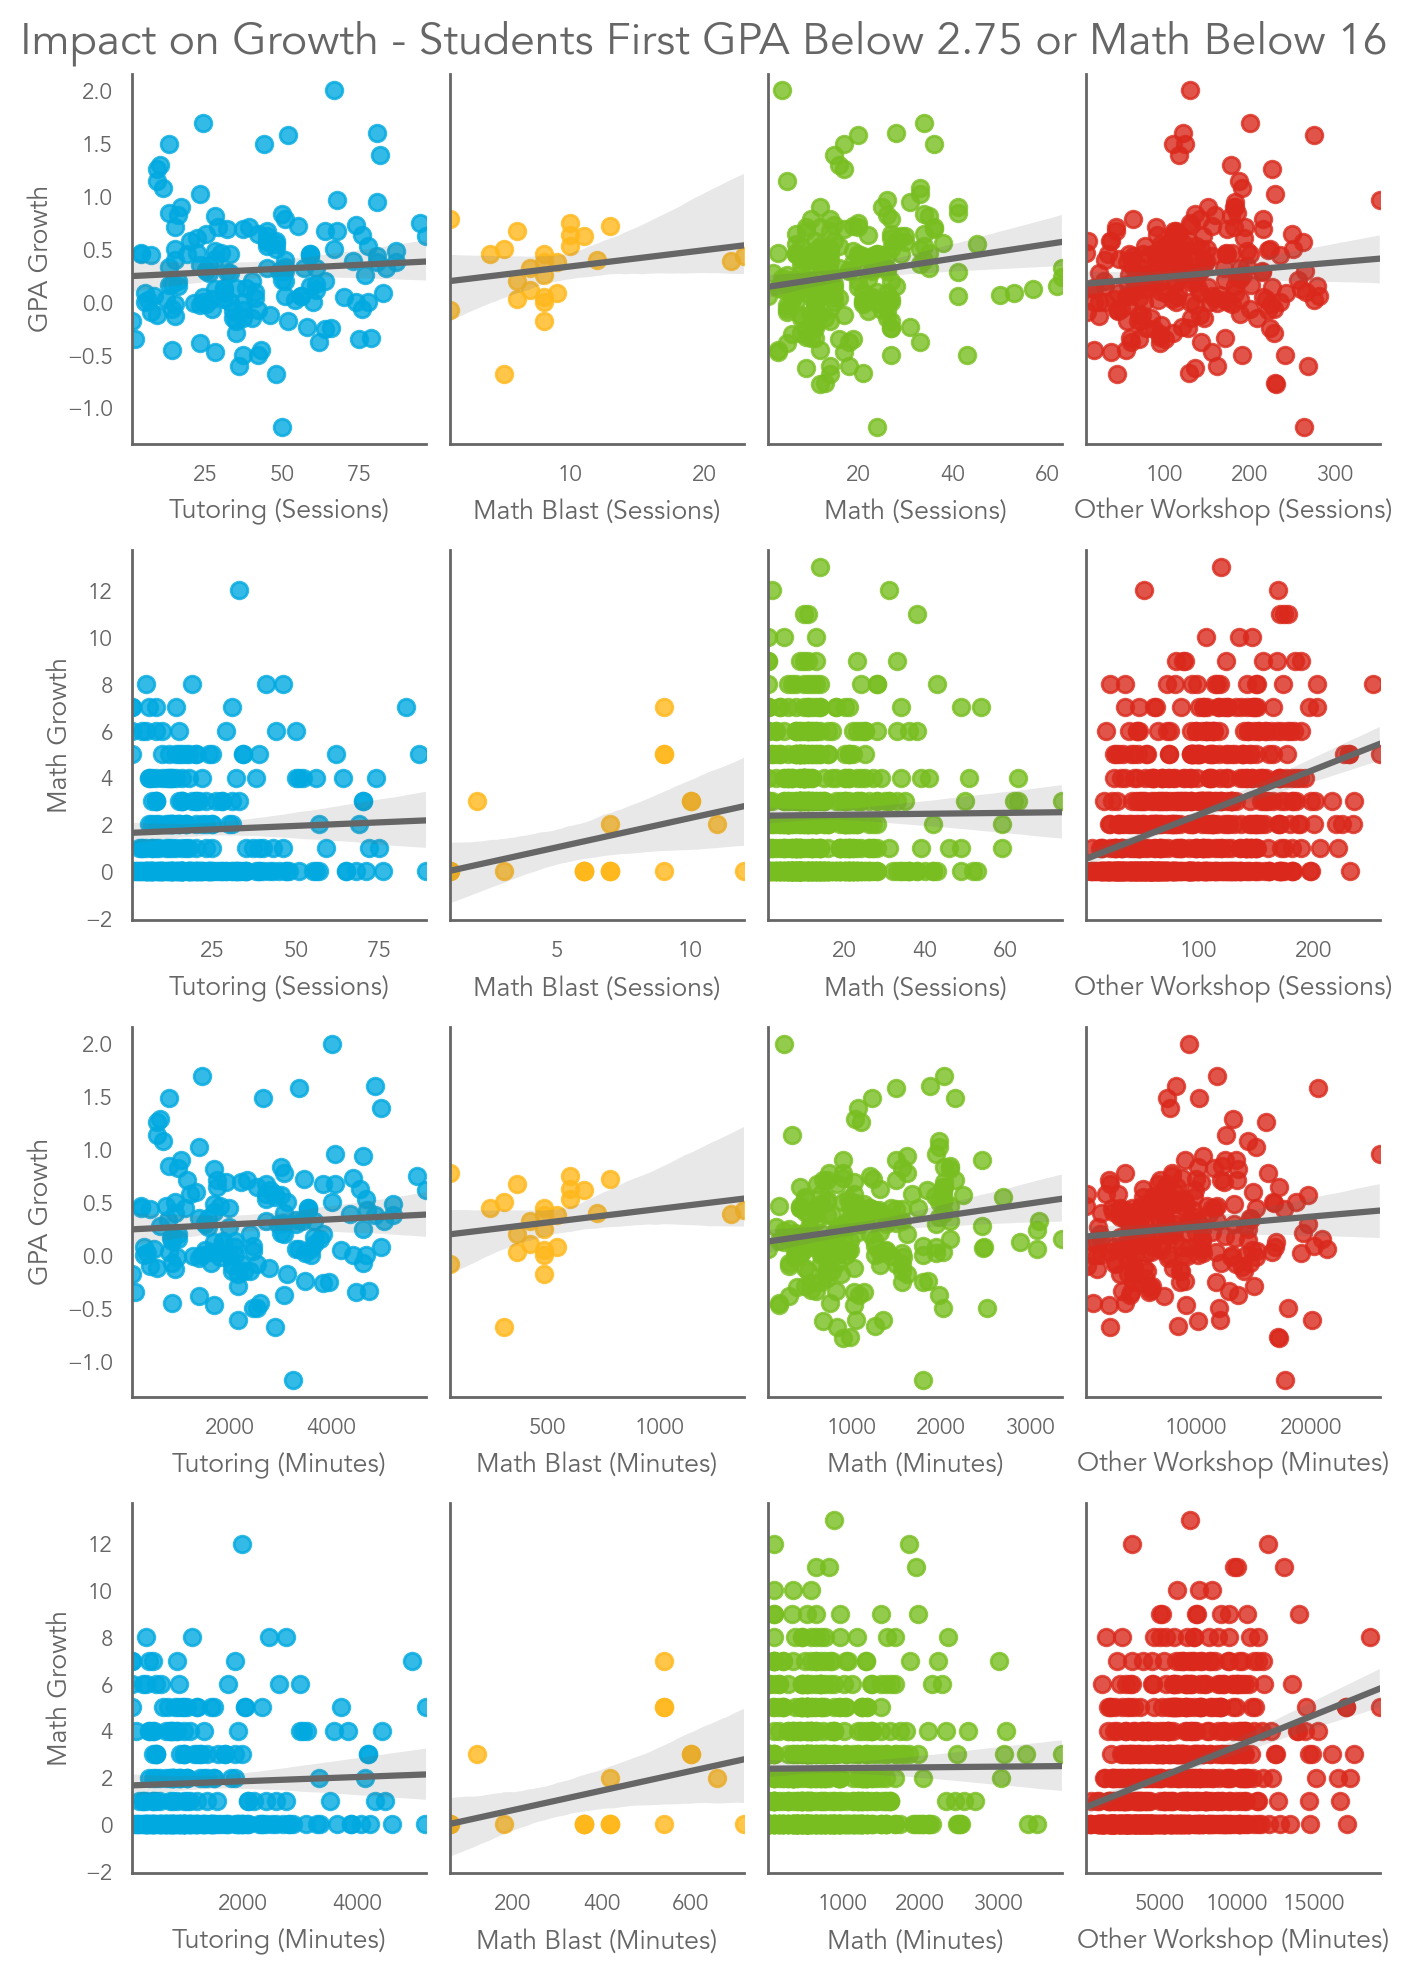

In [75]:
fig, axs = plt.subplots(4, 4, figsize=(7, 10), sharey="row")
fig.suptitle(
    "Impact on Growth - Students First GPA Below 2.75 or Math Below 16")


create_regression_plots_overall(overall_df_first_gpa_low, "Attendance_Numerator",
                                "gpa_growth", fig, axs, "GPA Growth", "(Sessions)", colors, 0)

create_regression_plots_overall(overall_df_first_math_low, "Attendance_Numerator",
                                "math_test_growth", fig, axs, "Math Growth", "(Sessions)", colors, 1)

create_regression_plots_overall(overall_df_first_gpa_low, "mod_duration_filled",
                                "gpa_growth", fig, axs, "GPA Growth", "(Minutes)", colors, 2)

create_regression_plots_overall(overall_df_first_math_low, "mod_duration_filled",
                                "math_test_growth", fig, axs, "Math Growth", "(Minutes)", colors, 3)


plt.savefig('overall.png', facecolor='w', edgecolor='w')

In [ ]:
overall_df_final

overall_df_valid_first_gpa
overall_df_valid_first_math

overall_df_first_gpa_low
overall_df_first_math_low


HS_11th_Cum_GPA
highest_math_score

math_test_growth
gpa_growth

## Regressions

In [116]:
mod = smf.ols(formula='math_test_growth ~  Attendance_Numerator_Math + Attendance_Numerator_Other_Workshop + Attendance_Numerator_Tutoring',
              data=overall_df_valid_first_math, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       math_test_growth   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     8.022
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           4.81e-05
Time:                        16:49:51   Log-Likelihood:                -402.45
No. Observations:                 182   AIC:                             812.9
Df Residuals:                     178   BIC:                             825.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [109]:
mod = smf.ols(formula='gpa_growth ~ mod_duration_filled_Math + mod_duration_filled_Math_Blast + mod_duration_filled_Other_Workshop + mod_duration_filled_Tutoring',
              data=overall_df_first_gpa_low)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             gpa_growth   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.394
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.262
Time:                        11:18:24   Log-Likelihood:                -7.0513
No. Observations:                  32   AIC:                             24.10
Df Residuals:                      27   BIC:                             31.43
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
# Tutoring Sessions on math test growth (all students)

# Tutoring session on math test growth (low gpa students)

In [ ]:
### Evaluating Impact on Highest GPA - Workshop Duration
mod = smf.ols(formula='HS_11th_Cum_GPA ~  mod_duration_filled_Math + mod_duration_filled_Other_Workshop + mod_duration_filled_Tutoring',
              data=overall_df_final, missing='drop')
res = mod.fit()
print(res.summary())

In [ ]:
### Evaluating Impact on Highest Math Test Score - Workshop Duration
mod = smf.ols(formula='highest_math_score ~  mod_duration_filled_Math + mod_duration_filled_Other_Workshop + mod_duration_filled_Tutoring',
              data=overall_df_final, missing='drop')
res = mod.fit()
print(res.summary())

In [ ]:
### Evaluating Impact on GPA Growth - Workshop Duration


mod = smf.ols(formula='gpa_growth ~  mod_duration_filled_Math + mod_duration_filled_Other_Workshop + mod_duration_filled_Tutoring',
              data=overall_df_valid_first_gpa, missing='drop')
res = mod.fit()
print(res.summary())

In [ ]:
### Evaluating Impact on Math Growth - Workshop Duration


mod = smf.ols(formula='math_test_growth ~  mod_duration_filled_Math + mod_duration_filled_Other_Workshop + mod_duration_filled_Tutoring',
              data=overall_df_valid_first_math, missing='drop')
res = mod.fit()
print(res.summary())

In [ ]:
### Evaluating Impact on GPA Growth For Students Below 2.75 GPA - Workshop Duration
mod = smf.ols(formula='gpa_growth ~ mod_duration_filled_Math + mod_duration_filled_Other_Workshop + mod_duration_filled_Tutoring',
              data=overall_df_first_gpa_low, missing='drop')
res = mod.fit()
print(res.summary())

In [ ]:
### Evaluating Impact on Math Growth For Students Below 16 Math Score - Workshop Duration


mod = smf.ols(formula='math_test_growth ~  mod_duration_filled_Math + mod_duration_filled_Other_Workshop + mod_duration_filled_Tutoring',
              data=overall_df_first_math_low, missing='drop')
res = mod.fit()
print(res.summary())